<a href="https://colab.research.google.com/github/Erinywang/ds4ph-bme/blob/master/Assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install dfply

     |████████████████████████████████| 614kB 5.4MB/s 


In [64]:
import pandas as pd
import torch
import statsmodels.formula.api as smf
import statsmodels as sm
import seaborn as sns
import matplotlib.pyplot as plt
from dfply import *
import numpy as np
import math


dat = pd.read_csv("shhs.txt",sep=",")
dat.head(4)

,pptid,clinic,Waist,COPD15,ASTHMA15,slp_lat,time_bed,timest1p,timest2p,times34p,timeremp,rdi4p,StLOutP,StOnsetP,SlpPrdP,Staging1,Staging2,Staging3,Staging4,Staging5,RestAn1,RestAn2,RestAn3,RestAn4,HTN,CVD,CHD,sex,age,smokstatus,bmi
0,0007,41,86,0,0,.,440.5,6.258322,60.852196,19.30759,13.581891,1.438083,28,28,22530,0,0,0,1,0,1,0,0,0,1,0,0,1,55,Former,21.78
1,0009,41,107,0,0,.,225.0,0.824176,65.65934,16.758242,16.758242,17.802198,0,0,10920,.,.,.,.,.,.,.,.,.,1,0,0,1,78,Never,32.95
2,0028,41,82,0,0,.,431.5,4.881451,40.306835,42.817295,11.994421,4.853556,167,167,21510,1,0,0,0,0,1,0,0,0,0,0,0,0,77,Never,24.11
3,0039,41,85,0,0,14,358.5,2.990033,29.401993,52.325581,15.282393,0.797342,54,82,18060,1,0,0,0,0,1,0,0,0,1,0,0,1,48,Never,20.19


In [37]:
dat2 = dat >> select(dat.Waist, dat.sex,dat.age, dat.rdi4p, dat.bmi) 
dat2.drop(dat2[dat2['bmi'] == '.'].index, inplace = True)
dat2['bmi'] = pd.to_numeric(dat2['bmi'], downcast="float")
dat2['rdi4p'] = pd.to_numeric(dat2['rdi4p'], downcast="float")
dat2['logRdi4p'] = np.log(dat2['rdi4p']+1)
dat2.head(5)

,Waist,sex,age,rdi4p,bmi,logRdi4p
0,86,1,55,1.438083,21.780001,0.891212
1,107,1,78,17.802198,32.950001,2.933974
2,82,0,77,4.853557,24.110001,1.767049
3,85,1,48,0.797342,20.190001,0.586309
4,76,0,66,2.756757,23.309999,1.323556


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


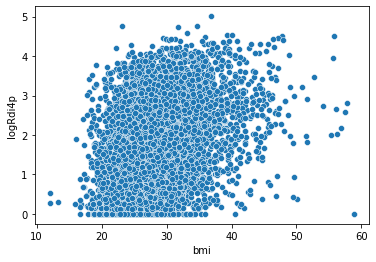

In [39]:
sns.scatterplot(dat2['bmi'], dat2['logRdi4p'])

In [38]:
lmBmi = smf.ols('logRdi4p ~ bmi', data = dat2).fit()
lmBmi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logRdi4p   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     973.8
Date:                Sun, 11 Apr 2021   Prob (F-statistic):          5.47e-199
Time:                        20:00:36   Log-Likelihood:                -8893.0
No. Observations:                6333   AIC:                         1.779e+04
Df Residuals:                    6331   BIC:                         1.780e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3430      0.067     -5.111      0.000      -0.475      -0.211
bmi            0.0722      0.002     31.207      0.000       0.068       0.077
==============================================================================
Omnibus:                      202.903   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.575
Skew:                           0.266   Prob(JB):                     4.04e-32
Kurtosis:                       2.485   Cond. No.                         157.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


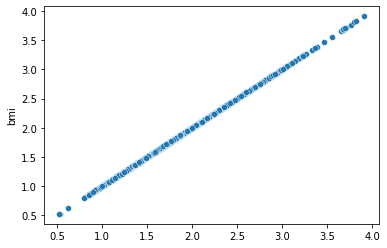

In [42]:
yhat = lmBmi.predict(dat2['bmi'])
test = -0.3430 + dat2['bmi'] * 0.0722
sns.scatterplot(yhat,test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


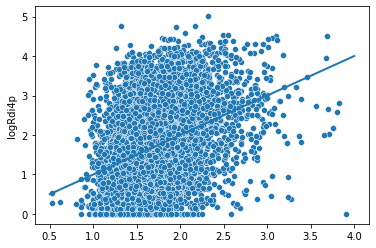

In [44]:
sns.scatterplot(yhat, dat2['logRdi4p'])
plt.plot([0.5, 4], [0.5, 4], linewidth=2)

In [65]:
y_pred = lmBmi.predict(pd.DataFrame({'bmi': [30]}))
rdi4p_pred = math.exp(y_pred) - 1
print(rdi4p_pred)

5.19241307116306
